In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [478]:
data = pd.read_csv('Dataset//Data_Train.csv')

In [479]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [481]:
data.shape

(10683, 11)

In [482]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [483]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [484]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [485]:
data[data['Route'].isna() | data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [486]:
data.dropna(inplace= True)

In [487]:
data.count()

Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64

In [488]:
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][: -1])
        minutes = int(duration.split() [1] [: -1])
        return hours * 60 + minutes
    else :
        return int(duration[: -1]) * 60

In [489]:
data['Duration'] = data['Duration'].apply(convert_duration)

In [490]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [491]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data.dtypes

C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\3322212648.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\3322212648.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])


Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [492]:
data['Dep_Time_in_hours'] = data['Dep_Time'].dt.hour
data['Dep_Time_in_minutes'] = data['Dep_Time'].dt.minute
data['Arrival_Time_in_hours'] = data['Arrival_Time'].dt.hour
data['Arrival_Time_in_minutes'] = data['Arrival_Time'].dt.minute
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-04-30 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-30 05:50:00,2024-04-30 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-04-30 09:25:00,2024-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-04-30 18:05:00,2024-04-30 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-04-30 16:50:00,2024-04-30 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [493]:
data.drop(['Dep_Time','Arrival_Time'],axis=1 , inplace= True)

In [494]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [495]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\541364744.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


In [496]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [497]:
data['Date_of_Journey'].dt.year.unique()

array([2019])

In [498]:
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [499]:
data.drop('Date_of_Journey',axis=True,inplace=True)

In [500]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [501]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [502]:
data['Total_Stops'] = data['Total_Stops'].map({
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
})

In [503]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,1,3


In [504]:
data.drop('Additional_Info',axis=1 , inplace=True)

In [505]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


In [506]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

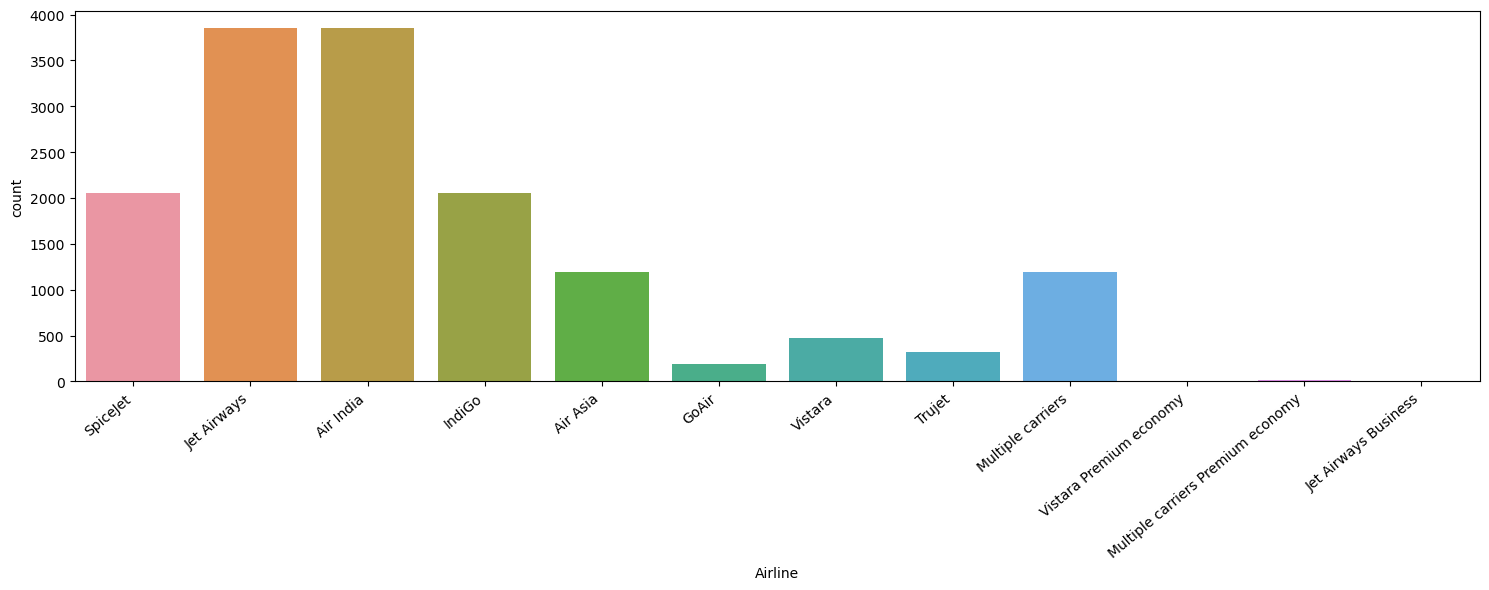

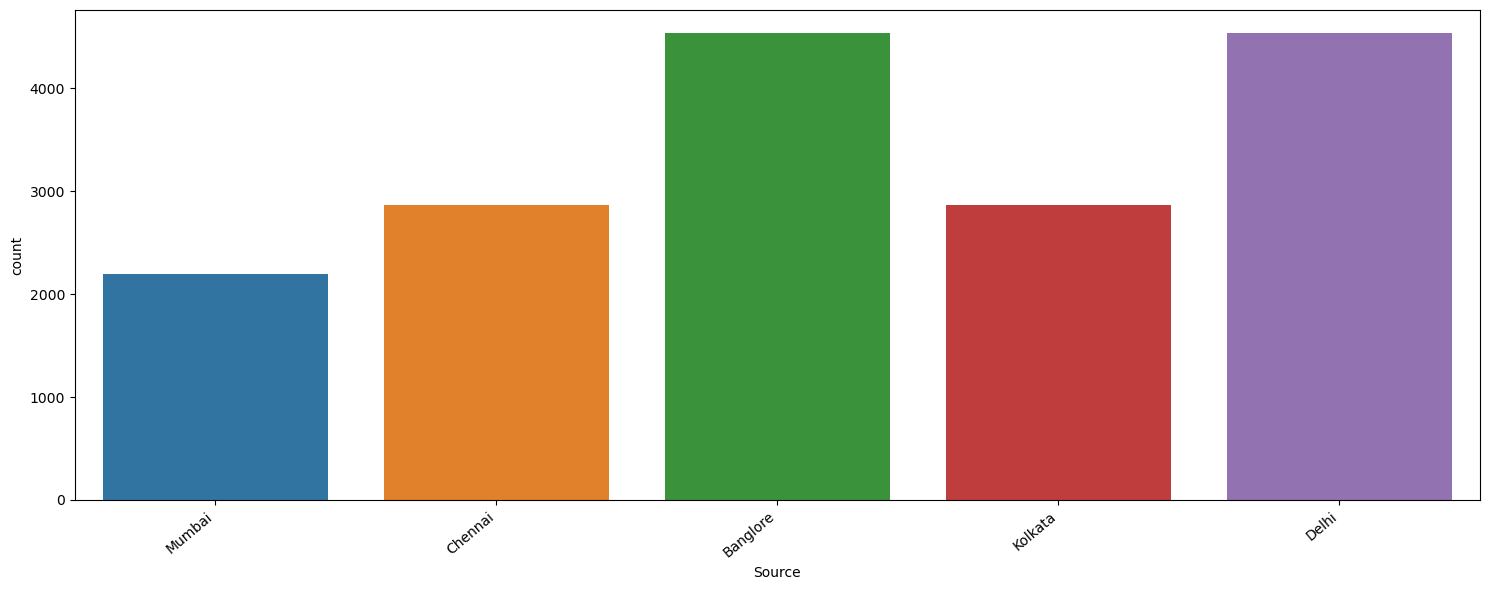

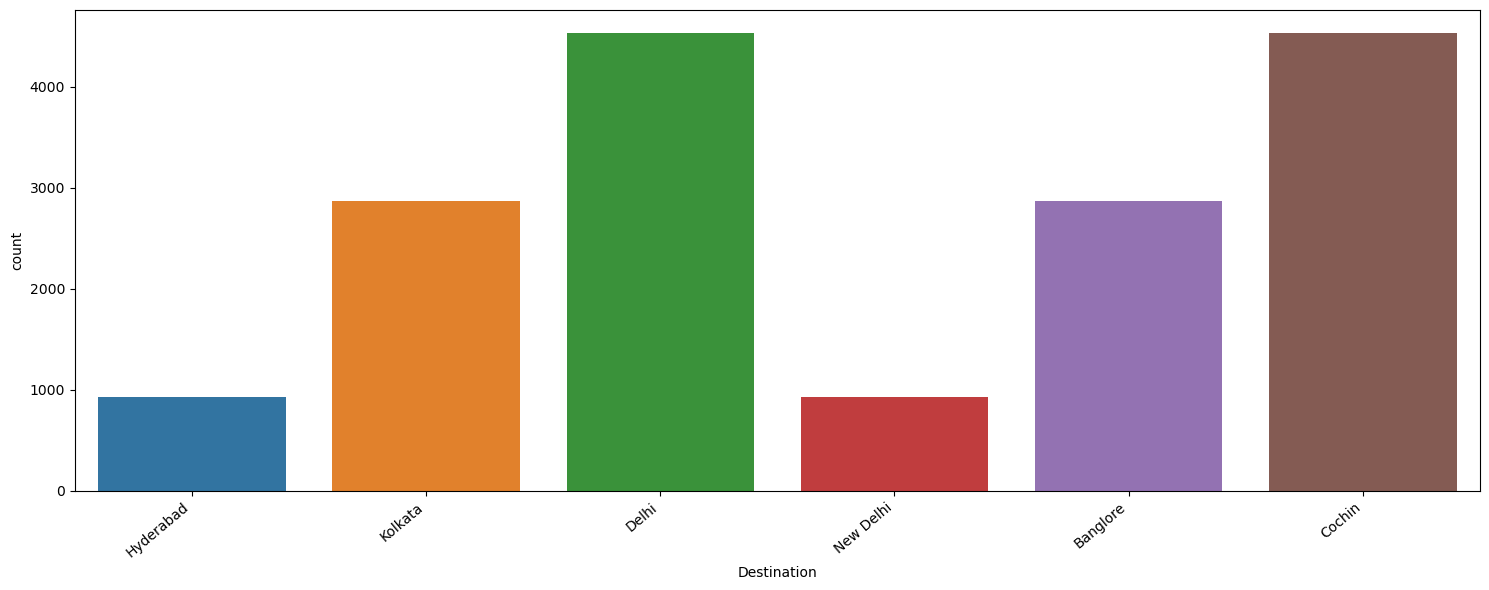

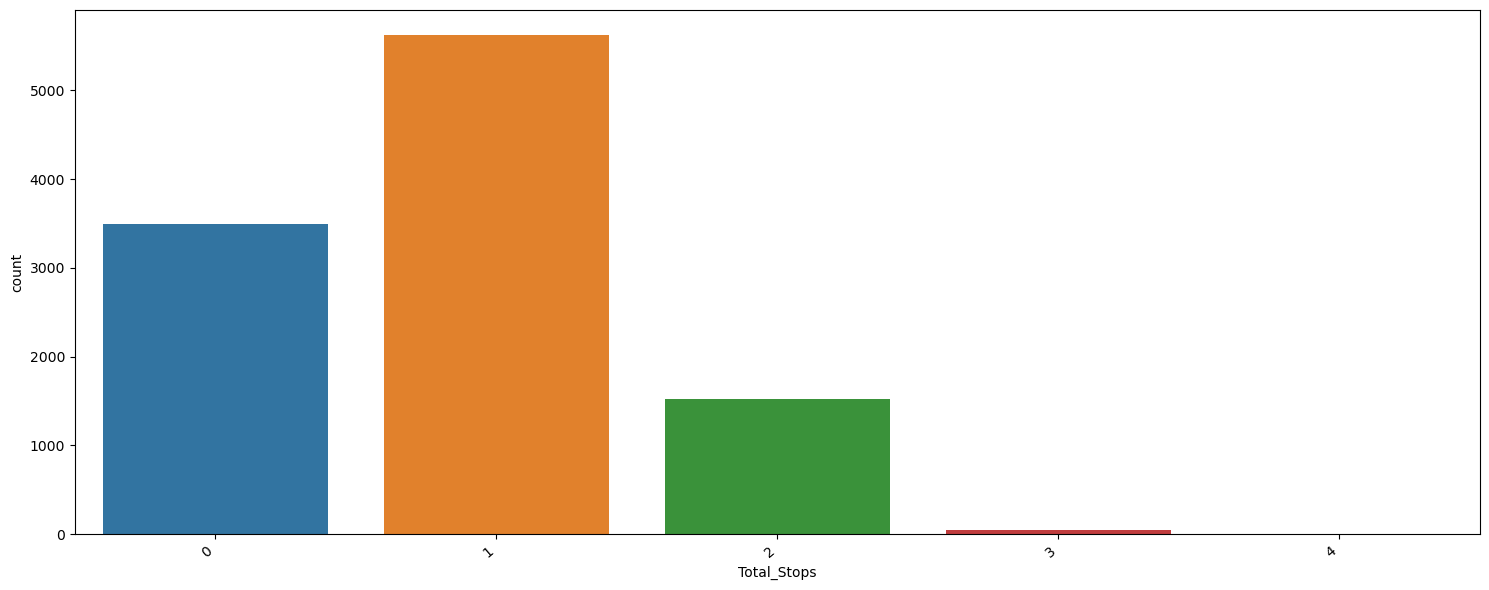

In [507]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    plt.figure(figsize=(15,6))
    sns.countplot(data = data, x = i)
    ax = sns.countplot(x = i , data= data.sort_values('Price' ,ascending=True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation =40 ,ha='right')
    plt.tight_layout()
    plt.show()
    print('\n\n')

In [508]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

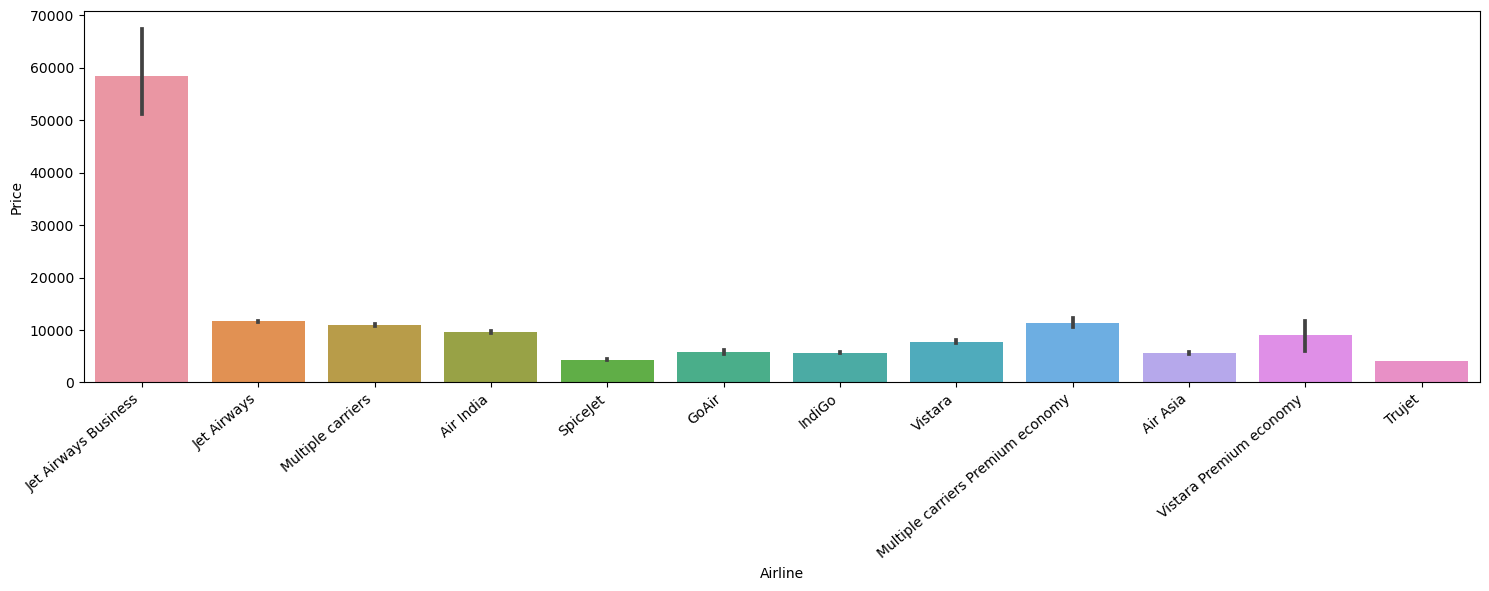

In [509]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x= 'Airline', y = 'Price', data= data.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation =40 ,ha='right')
plt.tight_layout()
plt.show()


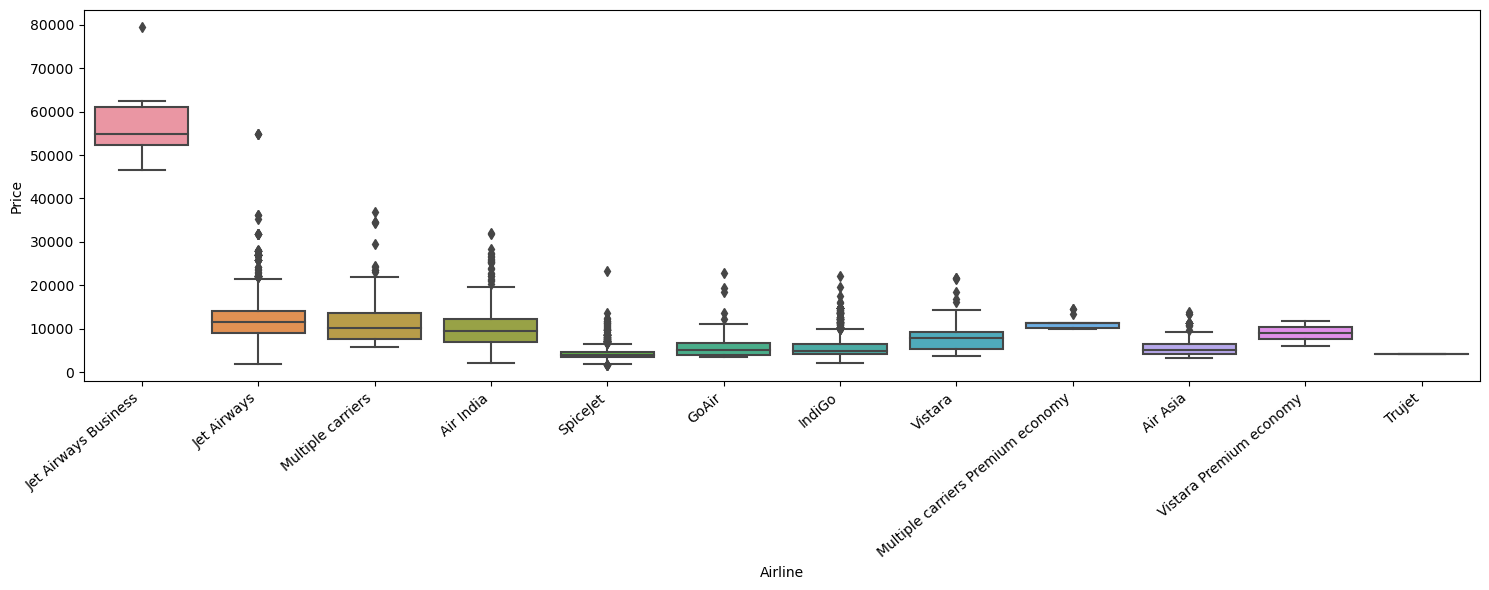

In [510]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x= 'Airline', y = 'Price', data= data.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation =40 ,ha='right')
plt.tight_layout()
plt.show()

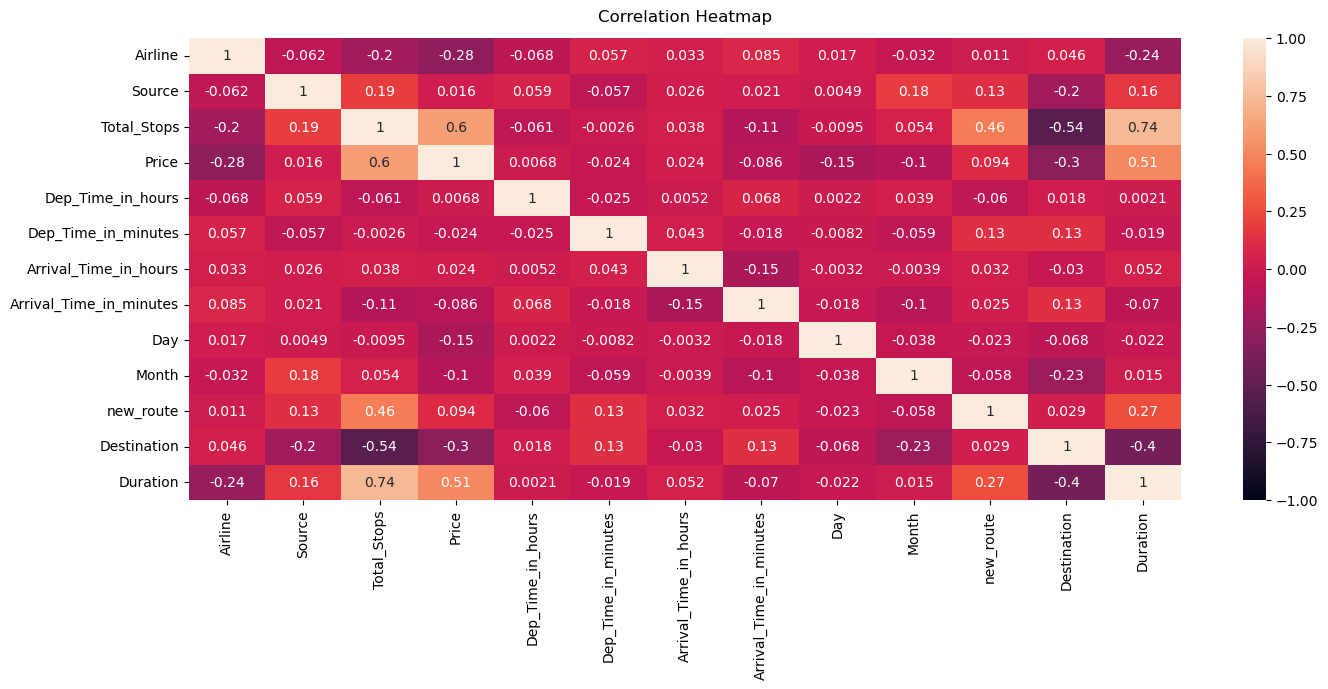

In [548]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [511]:
data.groupby('Airline').describe()['Price'].sort_values('mean',ascending= False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [512]:
data['Airline'] = data['Airline'].map({
    'Jet Airways' : 0,
    'IndiGo' : 1,
    'Air India' : 2,
    'Multiple carriers' : 3,
    'SpiceJet' : 4,
    'Vistara':5,
    'Air Asia' : 6,
    'GoAir' :7,
    'Multiple carriers Premium economy' : 8,
    'Jet Airways Business' : 9,
    'Vistara Premium economy' : 10,
    'Vistara Premium economy' : 11,
    'Trujet' :12 
    
})

In [513]:
data['Airline'].value_counts()

Airline
0     3849
1     2053
2     1751
3     1196
4      818
5      479
6      319
7      194
8       13
9        6
11       3
12       1
Name: count, dtype: int64

In [514]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,1,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,2,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,0,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,1,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,1,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


In [515]:
list1  = ['Source','Destination']
for l in list1:
    print(data[[l]].value_counts(), '\n')

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
Name: count, dtype: int64 



In [516]:
data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [517]:
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()
data['Source'] = ohe.fit_transform(data.Source)

In [518]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,1,0,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,2,3,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,0,2,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,1,3,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,1,0,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


In [519]:
route  = data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [520]:
data['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [521]:
route['Route_1'] = route['Route'].str.split('→').str[0]
route['Route_2'] = route['Route'].str.split('→').str[1]
route['Route_3'] = route['Route'].str.split('→').str[2]
route['Route_4'] = route['Route'].str.split('→').str[3]
route['Route_5'] = route['Route'].str.split('→').str[4]

route.head()

C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\2109748827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1'] = route['Route'].str.split('→').str[0]
C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\2109748827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2'] = route['Route'].str.split('→').str[1]
C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\2109748827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [522]:
route.fillna('None' ,inplace=True)

C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\3148718335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None' ,inplace=True)


In [523]:
value_route = route['Route'].value_counts()

In [524]:
top_routes = value_route.sort_values(ascending=False).head(10)

In [525]:
top_routes

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: count, dtype: int64

In [526]:
route['Route'] = route['Route'].map({
    'DEL → BOM → COK' : 0,
    'BLR → DEL' : 1,
    'CCU → BOM → BLR' : 2,
    'CCU → BLR' : 3,
    'BOM → HYD' : 4,
    'CCU → DEL → BLR':5,
    'BLR → BOM → DEL' : 6,
    'MAA → CCU' :7,
    'DEL → HYD → COK' : 8,
    'DEL → JAI → BOM → COK' : 9,
    
})

C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\3911164342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route'] = route['Route'].map({


In [527]:
route.Route.fillna('10', inplace=True)

C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\4157713637.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  route.Route.fillna('10', inplace=True)
C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\4157713637.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  route.Route.fillna('10', inplace=True)
C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\

In [528]:
route['new_route'] = route['Route']

C:\Users\Aakash\AppData\Local\Temp\ipykernel_6588\2081681688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['new_route'] = route['Route']


In [532]:
route =  route['new_route']

In [533]:
data = pd.concat([data,route],axis=1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,new_route
0,1,0,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3,1.0
1,2,3,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,10
2,0,2,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,10
3,1,3,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,10
4,1,0,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,10


In [534]:
data.drop('Route',axis=1,inplace=True)

In [535]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Day', 'Month', 'new_route'],
      dtype='object')

In [537]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,new_route
0,1,0,New Delhi,170,0,3897,22,20,1,10,24,3,1.0
1,2,3,Banglore,445,2,7662,5,50,13,15,1,5,10
2,0,2,Cochin,1140,2,13882,9,25,4,25,9,6,10
3,1,3,Banglore,325,1,6218,18,5,23,30,12,5,10
4,1,0,New Delhi,285,1,13302,16,50,21,35,1,3,10


In [539]:
data.Destination.value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [540]:
data['Destination'] = data['Destination'].map({
    'Cochin' : 0,
    'Banglore' : 1,
    'Delhi' : 2,
    'New Delhi' : 3,
    'Hyderabad' : 4,
    'Kolkata':5
    
})

In [541]:
temp_col = data.columns.to_list()
print(temp_col, '\n')

new_col = temp_col[: 2] + temp_col[3 :]
new_col.append(temp_col[2])
print(new_col,'\n')

data = data.reindex(columns = new_col)
data.head()

['Airline', 'Source', 'Duration', 'Total_Stops', 'Price', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'new_route', 'Destination'] 

['Airline', 'Source', 'Total_Stops', 'Price', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours', 'Arrival_Time_in_minutes', 'Day', 'Month', 'new_route', 'Destination', 'Duration'] 



,Airline,Source,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,new_route,Destination,Duration
0,1,0,0,3897,22,20,1,10,24,3,1.0,3,170
1,2,3,2,7662,5,50,13,15,1,5,10,1,445
2,0,2,2,13882,9,25,4,25,9,6,10,0,1140
3,1,3,1,6218,18,5,23,30,12,5,10,1,325
4,1,0,1,13302,16,50,21,35,1,3,10,3,285


In [ ]:
plt.

In [542]:
x = data.drop('Price', axis=1)

In [543]:
y = data['Price']

In [544]:
x.head()

,Airline,Source,Total_Stops,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,new_route,Destination,Duration
0,1,0,0,22,20,1,10,24,3,1.0,3,170
1,2,3,2,5,50,13,15,1,5,10,1,445
2,0,2,2,9,25,4,25,9,6,10,0,1140
3,1,3,1,18,5,23,30,12,5,10,1,325
4,1,0,1,16,50,21,35,1,3,10,3,285


In [549]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test , y_train, y_test = tts(x,y,test_size =0.1,random_state =69)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 12)
(1069, 12)
(9613,)
(1069,)


## Linear Regression

In [550]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [551]:
from sklearn.metrics import mean_squared_error ,r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:',mean_squared_error(y_true,y_pred) ** 0.5)
    print(f'R_squared value :',r2_score(y_true,y_pred))

def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 -mape
    return accuracy

In [552]:
y_pred = model.predict(x_test)

In [553]:
metrics(y_test,y_pred)

RMSE: 2684.4527961565223
R_squared value : 0.5827699769317021


In [554]:
accuracy(y_test,y_pred)

73.30299162116003

## Random Forest

In [576]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor()
model_random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [577]:
pred_rf = model_random_forest.predict(x_test)

In [578]:
metrics(y_test, pred_rf)

RMSE: 1797.0165557503735
R_squared value : 0.8130316200199481


In [579]:
accuracy(y_test,pred_rf)

87.1756026237521

In [580]:
import pickle

# Assuming 'model' is the trained RandomForestRegressor
with open('rfmodel_flight.pkl', 'wb') as file:
    pickle.dump(model_random_forest, file)